## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline
import matplotlib.pyplot as plt

## Base de Datos

In [66]:
datos=pd.read_csv("data_01.txt", sep="\t")
datos

,fecha,idTerminal,oper
0,2017-01-31 08:19:33.000,1828,0
1,2017-01-31 08:47:16.000,1828,1
2,2017-01-31 08:48:07.000,1828,1
3,2017-01-31 08:48:58.000,1828,1
4,2017-01-31 08:49:53.000,1828,1
...,...,...,...
775461,2017-05-31 23:53:06.000,1980,7
775462,2017-05-31 23:54:46.000,1980,7
775463,2017-05-31 23:57:03.000,1964,4
775464,2017-05-31 23:58:15.000,1964,0


### Transformación variable fecha

In [16]:
name = datos["fecha"].str.split(expand=True)
name.columns = ['fecha', 'tiempo']
df = pd.concat([datos, name], axis=1)
df

,fecha,idTerminal,oper,fecha,tiempo
0,2017-01-31 08:19:33.000,1828,0,2017-01-31,08:19:33.000
1,2017-01-31 08:47:16.000,1828,1,2017-01-31,08:47:16.000
2,2017-01-31 08:48:07.000,1828,1,2017-01-31,08:48:07.000
3,2017-01-31 08:48:58.000,1828,1,2017-01-31,08:48:58.000
4,2017-01-31 08:49:53.000,1828,1,2017-01-31,08:49:53.000
...,...,...,...,...,...
775461,2017-05-31 23:53:06.000,1980,7,2017-05-31,23:53:06.000
775462,2017-05-31 23:54:46.000,1980,7,2017-05-31,23:54:46.000
775463,2017-05-31 23:57:03.000,1964,4,2017-05-31,23:57:03.000
775464,2017-05-31 23:58:15.000,1964,0,2017-05-31,23:58:15.000


In [17]:
df= df.iloc[:,1:4]
df

,idTerminal,oper,fecha
0,1828,0,2017-01-31
1,1828,1,2017-01-31
2,1828,1,2017-01-31
3,1828,1,2017-01-31
4,1828,1,2017-01-31
...,...,...,...
775461,1980,7,2017-05-31
775462,1980,7,2017-05-31
775463,1964,4,2017-05-31
775464,1964,0,2017-05-31


In [18]:
def crear_const(x):
    if x>=0:
        return 1

df['trx']= df['oper'].apply(crear_const)

In [19]:
df

,idTerminal,oper,fecha,trx
0,1828,0,2017-01-31,1
1,1828,1,2017-01-31,1
2,1828,1,2017-01-31,1
3,1828,1,2017-01-31,1
4,1828,1,2017-01-31,1
...,...,...,...,...
775461,1980,7,2017-05-31,1
775462,1980,7,2017-05-31,1
775463,1964,4,2017-05-31,1
775464,1964,0,2017-05-31,1


### Seleccionar las 5 terminales con mayor transacciones

In [67]:
df[['idTerminal','trx']].groupby('idTerminal').sum().reset_index()

,idTerminal,trx
0,1507,4496
1,1515,4325
2,1537,11346
3,1574,10791
4,1575,20448
5,1577,18998
6,1582,11224
7,1593,23014
8,1594,10258
9,1597,9188


In [68]:
df2= df[(df['idTerminal']==1774)|(df['idTerminal']==1908)|(df['idTerminal']==1964)|(df['idTerminal']==1910)|(df['idTerminal']==1980)]

### Seleccionar las 5 operaciones con mayor transacciones

In [69]:
df[['oper','trx']].groupby('oper').sum().reset_index()

,oper,trx
0,0,423929
1,1,79195
2,2,7526
3,3,127399
4,4,35817
5,5,16124
6,6,6066
7,7,50662
8,8,3292
9,9,4600


In [70]:
df3= df2[(df2['oper']==0)|(df2['oper']==3)|(df2['oper']==1)|(df2['oper']==7)|(df2['oper']==4)]
df3

,idTerminal,oper,fecha,trx
442,1964,3,2017-01-31,1
446,1964,0,2017-01-31,1
459,1964,0,2017-01-31,1
467,1964,4,2017-01-31,1
475,1964,0,2017-01-31,1
...,...,...,...,...
775454,1910,0,2017-05-31,1
775461,1980,7,2017-05-31,1
775462,1980,7,2017-05-31,1
775463,1964,4,2017-05-31,1


##### Se selecciona primeramente las 5 terminales con mayor cantidad de transacciones y finalmente se eligen las 5 operaciones con mayor cantidad de operaciones. Esto con el fin de poder tener una muestra con la que podamos desarrollar el estudio, cabe recalcar que el estudio solo será representativo para las terminales y operaciones con mayor frecuencia.

# Análisis Exploratorio

##### Para el análisis exploratorio se busca encontrar patrones de comportamiento que puedan ayudar a contribuir en análisis inferenciales y predictivos posteriores. Por esto, se observaran las distribuciones y tendencias que tienen las variables de estudio:

## Distribución de las operaciones

<AxesSubplot: xlabel='oper'>

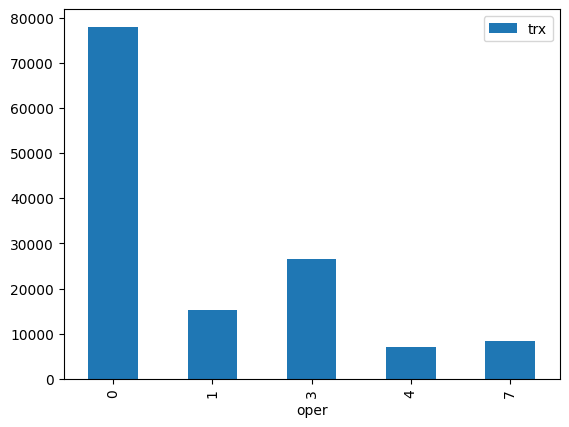

In [29]:
df3[['oper','trx']].groupby('oper').sum().plot(kind='bar')


##### La distribución de la variable operaciones deja en evidencia que las operaciones 0, son las de mayor frecuencia de transacciones con una diferencia de casi 3 veces con respecto al siguiente, que es la operación número 3. Por otro lado, la operación número 4 es la de menor frecuencia de operaciones.

## Distribución de la Terminal

<AxesSubplot: xlabel='idTerminal'>

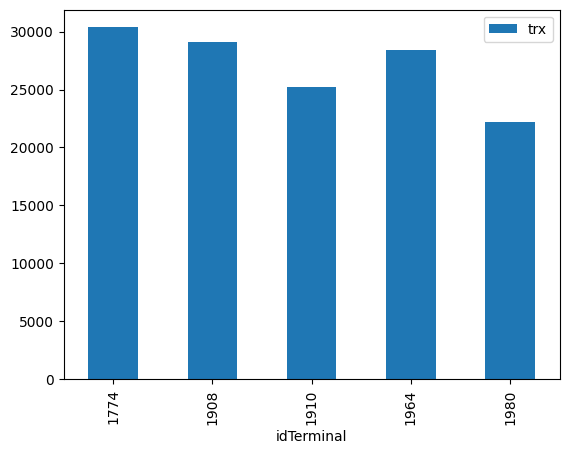

In [81]:
df3[['idTerminal','trx']].groupby('idTerminal').sum().plot(kind='bar')

##### La distribución de la variable terminal deja en evidencia una simetria en cuanto a la cantidad de transacciones.

## Gráfico de tendencia general por día

<AxesSubplot: xlabel='fecha'>

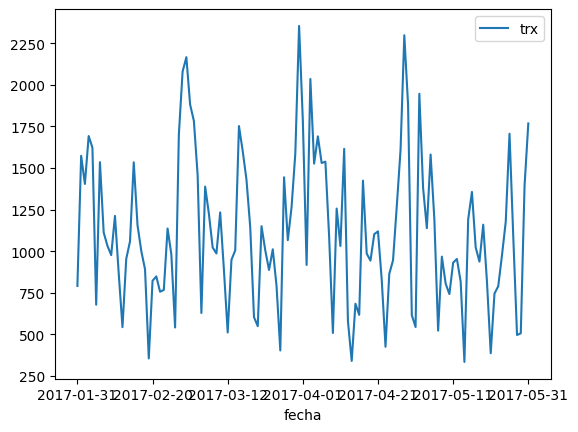

In [73]:
df3[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')

##### Este primer grafico deja en evidencia el comportamiento de las transacciones a lo largo de los dias, en el cual podemos observar ciertos ciclos. Ademas, se podria inferir que existe estacionalidad, ya que a simple vista se pueden ver comportamientos con media y varianza constante a lo largo del tiempo, esto último se debe evaluar mediante un test de hipostesis.

## Gráfico de tendencia mes

C:\Users\TRUDATA\AppData\Local\Temp\ipykernel_8736\2154344800.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['mes']= df3['fecha'].apply(crear_mes)


<AxesSubplot: xlabel='mes'>

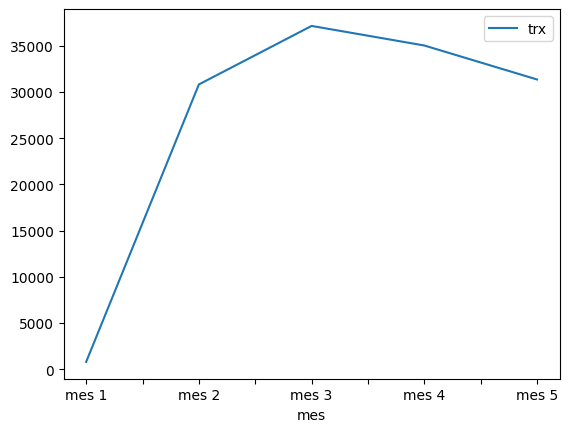

In [74]:
def crear_mes(x):
    if x>='2017-01-31' and x<'2017-02-01':
        return 'mes 1'
    elif x>='2017-02-01' and x<'2017-03-01':
        return 'mes 2'
    elif x>='2017-03-01' and x<'2017-04-01':
        return 'mes 3'
    elif x>='2017-04-01' and x<'2017-05-01':
        return 'mes 4'
    elif x>='2017-05-01' and x<'2017-06-01':
        return 'mes 5'

df3['mes']= df3['fecha'].apply(crear_mes)

df3[['trx','mes']].groupby(['mes']).sum().plot(kind='line')

##### Observando el gráfico de tendencia por mes se pudo observar que del mes 2 al mes 3 hubo un ligero crecimiento en las transacciones y a partir del més 3 existe una tendencia en la disminución de transacciones.

## Gráfico de tendencia por quincena

C:\Users\TRUDATA\AppData\Local\Temp\ipykernel_8736\2994566779.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['quincena']= df3['fecha'].apply(crear_quincena)


<AxesSubplot: xlabel='quincena'>

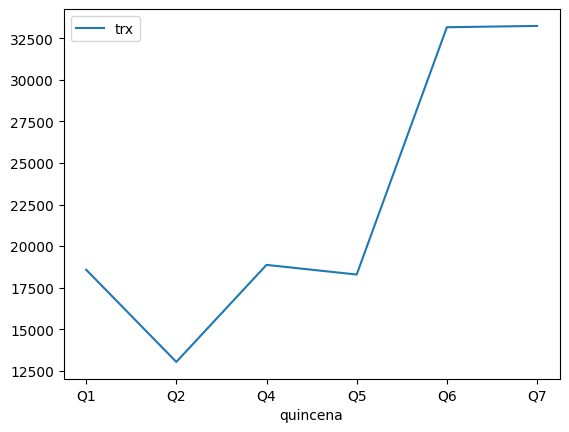

In [75]:
def crear_quincena(x):
    if x>='2017-01-31' and x<='2017-02-15':
        return 'Q1'
    elif x>'2017-02-15' and x<'2017-03-01':
        return 'Q2'
    elif x>='2017-03-01' and x<='2017-03-15':
        return 'Q4'
    elif x>'2017-03-15' and x<'2017-04-01':
        return 'Q5'
    elif x>='2017-04-01' and x<='2017-04-15':
        return 'Q6'
    elif x>'2017-04-15' and x<'2017-05-01':
        return 'Q7'
    elif x>='2017-05-01' and x<='2017-05-15':
        return 'Q6'
    elif x>'2017-05-15':
        return 'Q7'

df3['quincena']= df3['fecha'].apply(crear_quincena)
df3[['trx','quincena']].groupby(['quincena']).sum().plot(kind='line')

##### Este gráfico de tendencia por quincena es muy importante para el estudio ya que uno de los objetivos es predecir los 15 dias siguientes. Aqui podemos observar que de la quincena 5 a la 6 hubo un crecimiento notorio en la cantidad de transacciones y a partir de aquí se tiene un comportamiento constante, lo cual puede dar indicios de que en los siguientes 15 dias es probable que no existan cambios significativos en cuanto a las transacciones.

## Gráfico de tendencia por operación (diario)

In [78]:
oper_0= df3[(df3['oper']==0)]
oper_3= df3[(df3['oper']==3)]
oper_1= df3[(df3['oper']==1)]
oper_7= df3[(df3['oper']==7)]
oper_4= df3[(df3['oper']==4)]



<AxesSubplot: xlabel='fecha'>

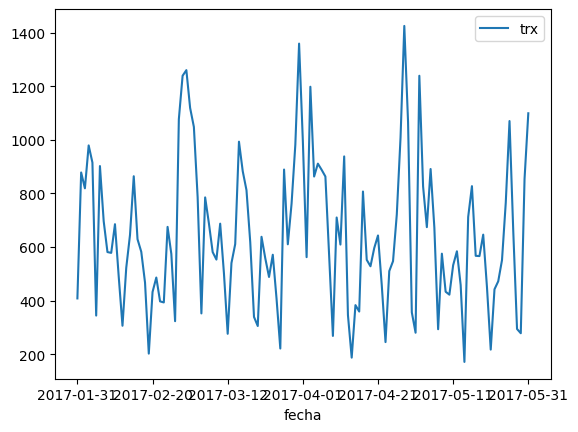

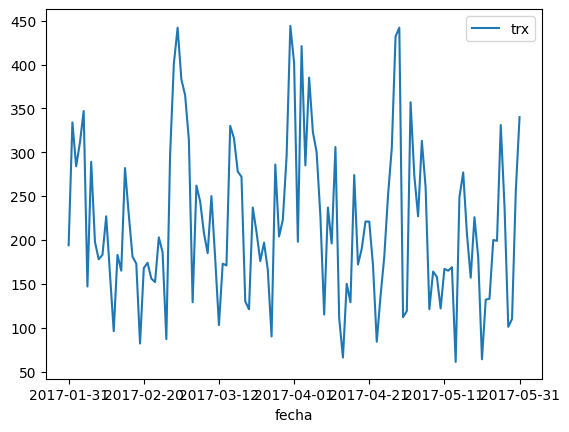

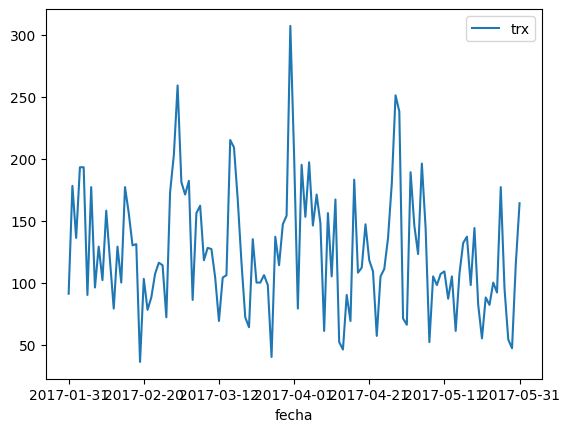

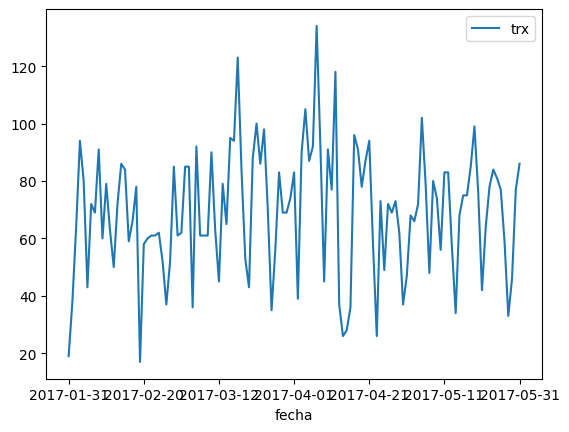

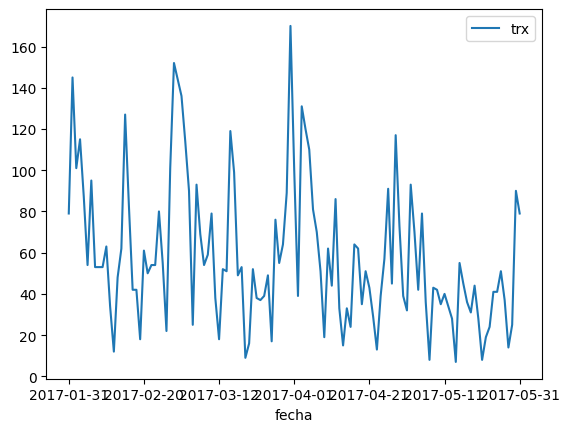

In [79]:
oper_0[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')
oper_3[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')
oper_1[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')
oper_7[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')
oper_4[['trx','fecha']].groupby(['fecha']).sum().plot(kind='line')

##### Las tendencias diarias por cada operación son muy interesantes de observar para el estudio, ya que podemos observar que todas presentan ciertos ciclos y a su vez presentan grandes diferencias. Por lo cual, las operaciones pueden ser una buena variable predictiva para la predicción de las transacciones.

## Gráfico de tendencia por Terminal (diario)

<AxesSubplot: xlabel='fecha'>

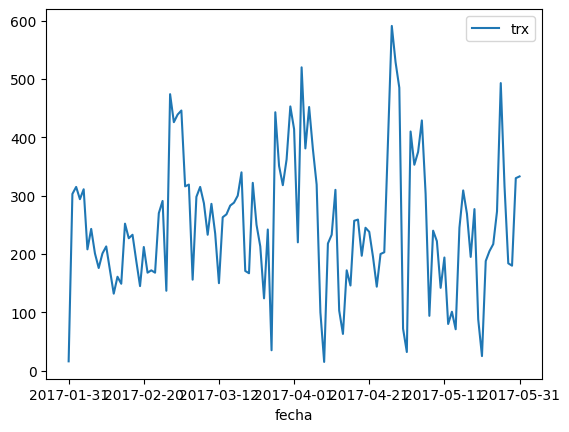

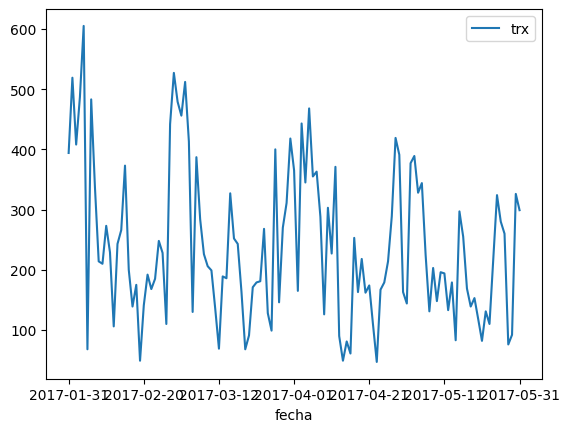

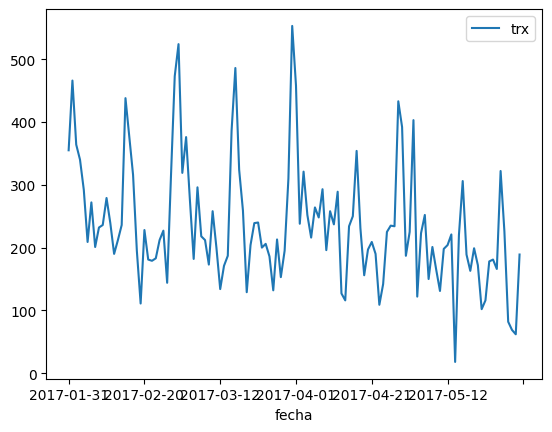

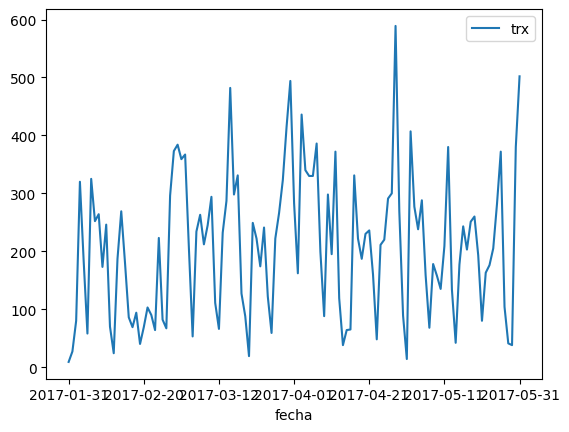

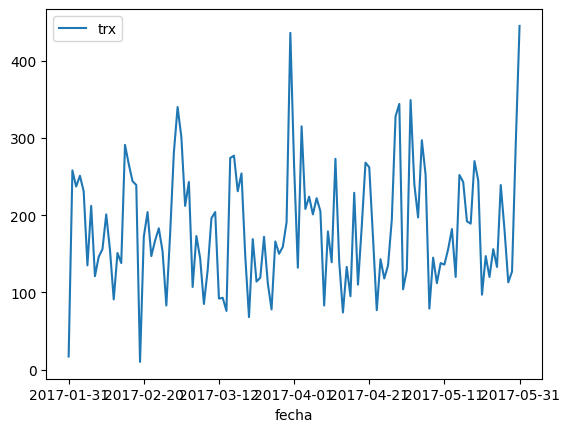

In [83]:
df2= df[(df['idTerminal']==1774)|(df['idTerminal']==1908)|(df['idTerminal']==1964)|(df['idTerminal']==1910)|(df['idTerminal']==1980)]
term0 = df3[(df3['idTerminal'] == 1774)]
term1 = df3[(df3['idTerminal'] == 1908)]
term2 = df3[(df3['idTerminal'] == 1964)]
term3 = df3[(df3['idTerminal'] == 1910)]
term4 = df3[(df3['idTerminal'] == 1980)]

term0[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')
term1[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')
term2[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')
term3[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')
term4[['trx', 'fecha']].groupby(['fecha']).sum().plot(kind='line')

##### Las tendencias diarias por cada terminal son muy interesantes de observar para el estudio, ya que podemos observar que todas presentan ciertos ciclos y a su vez presentan grandes diferencias. Por lo cual, las terminales pueden ser una buena variable predictiva para la predicción de las transacciones.

## Tendencia por Quincena para cada operación

<AxesSubplot: xlabel='quincena'>

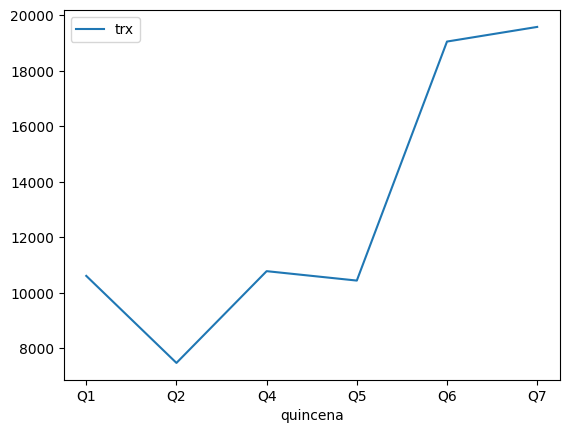

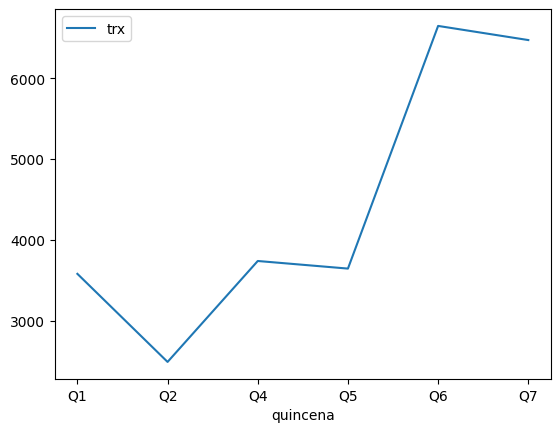

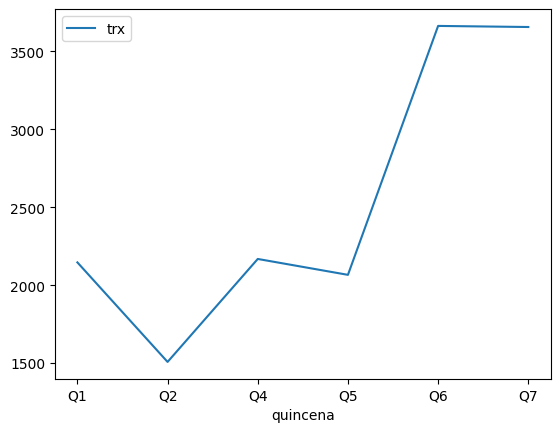

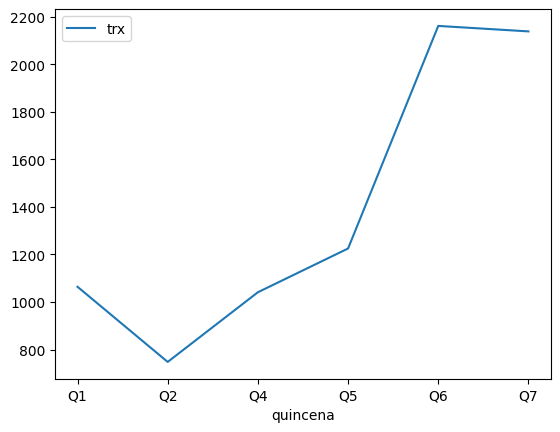

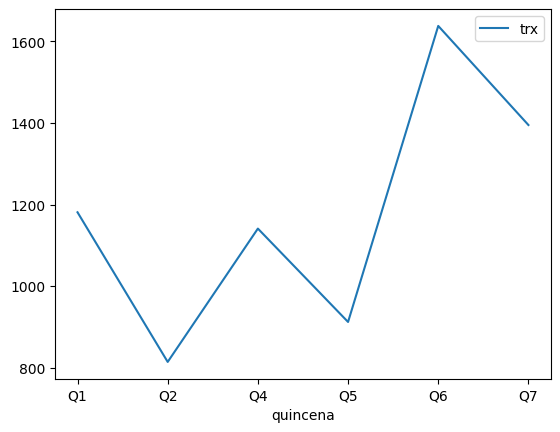

In [64]:
oper_0[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')
oper_3[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')
oper_1[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')
oper_7[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')
oper_4[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')

##### Revisando estas tendencia por quincena para cada operación, podemos observar que todas las operaciones presentan una cantidad de transacciones constantes en la última quincena, a excepción de la operación número 4, la cual claramente presenta una disminución significativa.

## Tendencia por quincena para cada terminal

<AxesSubplot: xlabel='quincena'>

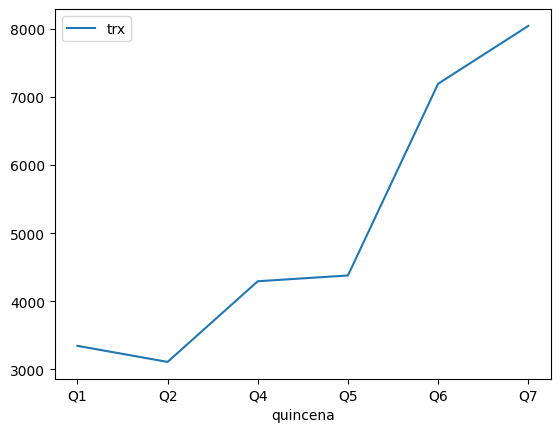

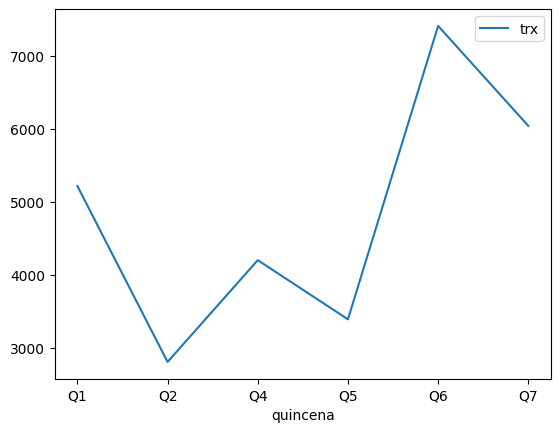

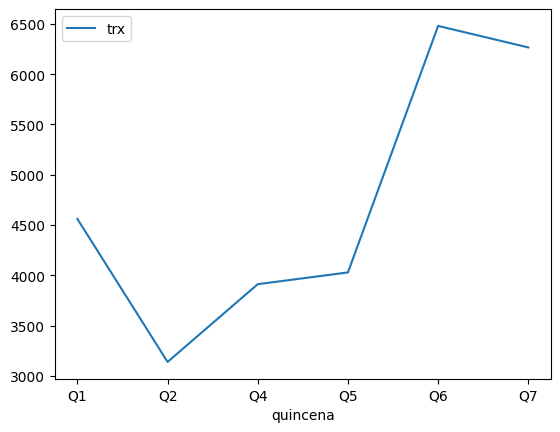

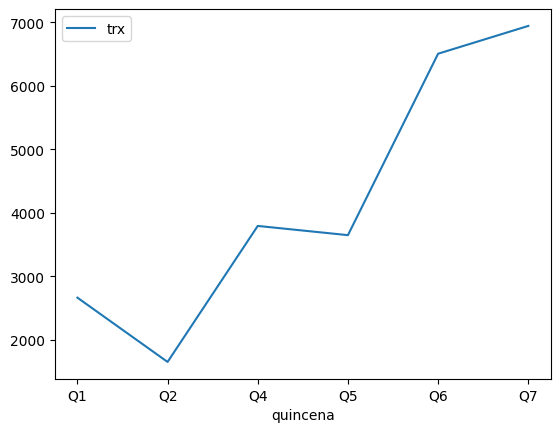

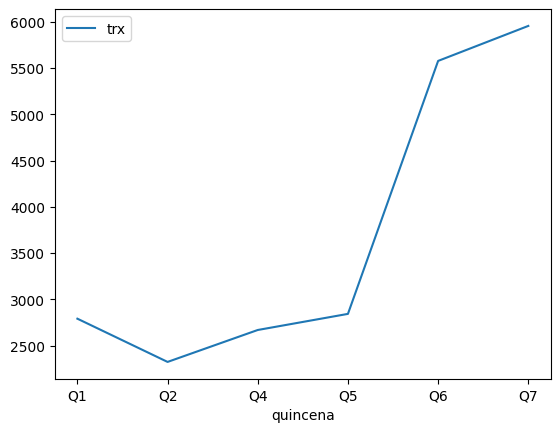

In [65]:
term0[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')
term1[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')
term2[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')
term3[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')
term4[['trx', 'quincena']].groupby(['quincena']).sum().plot(kind='line')

##### Revisando estas tendencias por quincena para cada terminal, podemos observar que todas las terminales presentan una cantidad de transacciones constantes en la última quincena, a excepción de la terminal número 1908, la cual claramente presenta una disminución significativa.